# About the dataset
The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type.



# Target
Our final target is to find the suitable drug for the patients of wjich the details are inputed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

In [3]:
df=pd.read_csv('../input/drug-classification/drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# EDA

### Seperating numerical and categorical columns

In [6]:
#categorical columns
categ_column=[column for column in df.columns if df[column].dtype=='object']
#numerical columns
numeric_column=df.drop(categ_column,axis=1).columns

### Plotting count plot for categorical features

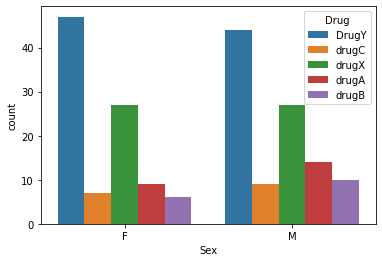

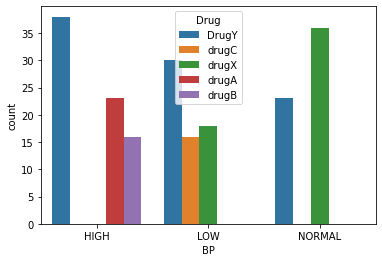

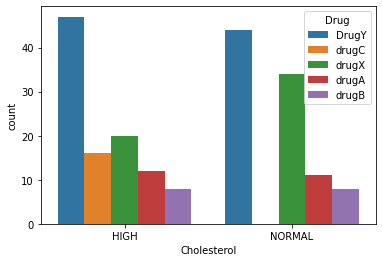

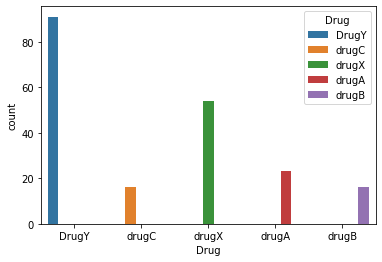

In [7]:
import warnings
warnings.filterwarnings('ignore')
for column in categ_column:
    sns.countplot(df[column],hue=df['Drug'])
    plt.show()

### Some findings:
### 1.We observe that the drug C is given only to the people having Low Blood pressure,
### 2.Drug X is not given to the people with High Blood pressure,
### 3.Drug B and Drug A is given only to the person with High BP, and
### 4.Drug C is given only to the people with high cholesterol


### for numerical features, plotting histogram

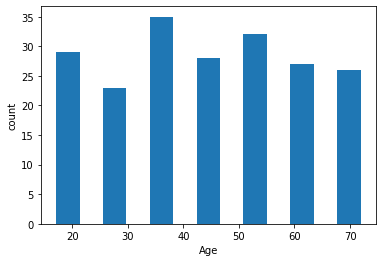

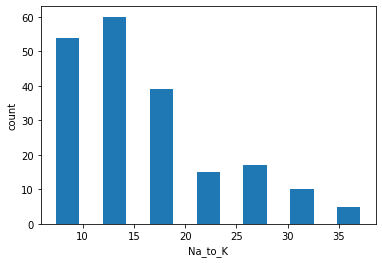

In [8]:
for column in numeric_column:
    plt.hist(df[column],bins=7,rwidth=0.5)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()

## Pretty much balanced data

### checking for any outliers in the Age and Na_to_K column

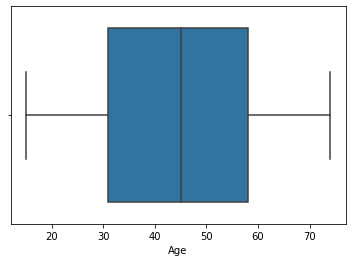

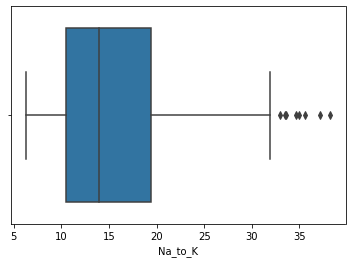

In [9]:
for column in numeric_column:
    sns.boxplot(df[column])
    plt.show()

### OH!! , we found some outliers in the 'Na_to_k' column which we will remove while data cleaning

# Let's move to data cleaning

### Removing outliers

#### Interquartile Range :
#### The interquartile range (IQR), also called as midspread or middle 50%, or technically H-spread is the difference between the third quartile (Q3) and the first quartile (Q1). It covers the center of the distribution and contains 50% of the observations. IQR = Q3 – Q1
#### we can use sklearn's quantile fuction to find the inter quartile range

In [10]:
#first quartile
Q1=df['Na_to_K'].quantile(0.25)
# 3rd quartile
Q3=df['Na_to_K'].quantile(0.75)
#Inter quartile range
IQR=Q3-Q1
#upper fence = Q3+1.5*IQR
upper=Q3+ 1.5*IQR
# lower fence= Q1-1.5*IQR
lower= Q1 - 1.5*IQR

In [11]:
#putting conditions
df=df[(df['Na_to_K']<upper) & (df['Na_to_K']>lower)]

<AxesSubplot:xlabel='Na_to_K'>

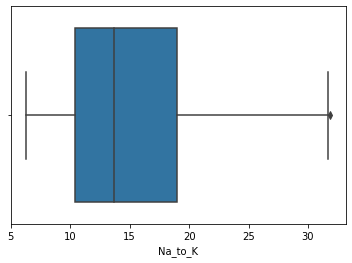

In [12]:
sns.boxplot(df['Na_to_K'])

### Yay! outliers removed.

### There is nothing much for cleaning since the data is already clean.

### lets convert categorical columns into numbers using Label encoding

In [13]:
for column in categ_column:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])

In [14]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


###  successfully encoded

###  Now our data seems to be perfect for prediction

### Lets first perform the train test split

In [15]:
X_train, X_test, y_train, y_test=train_test_split(df.drop('Drug',axis=1),df['Drug'],test_size=0.2,stratify=df['Drug'])

#### We will use different models for prediction

### 1. Logistic Regression

In [16]:
model_lr=LogisticRegression(solver='liblinear')
model_lr.fit(X_train,y_train)
ypred_lr=model_lr.predict(X_test)
confusion_matrix(y_test,ypred_lr)

array([[16,  0,  0,  0,  1],
       [ 2,  2,  1,  0,  0],
       [ 1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 11]])

Text(33.0, 0.5, 'Actual')

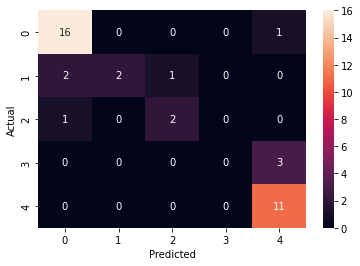

In [17]:
sns.heatmap(confusion_matrix(y_test,ypred_lr),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       1.00      0.40      0.57         5
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         3
           4       0.73      1.00      0.85        11

    accuracy                           0.79        39
   macro avg       0.65      0.60      0.59        39
weighted avg       0.75      0.79      0.75        39



### 2. DecisionTreeclassifier

In [19]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
ypred_dt=model_dt.predict(X_test)
confusion_matrix(y_test,ypred_dt)

array([[17,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]])

Text(33.0, 0.5, 'Actual')

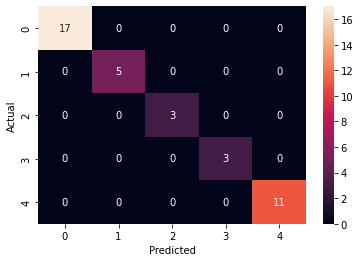

In [20]:
sns.heatmap(confusion_matrix(y_test,ypred_dt),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### 3.Randomforestclassifier

In [22]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
ypred_rf=model_rf.predict(X_test)
confusion_matrix(y_test,ypred_rf)

array([[17,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]])

Text(33.0, 0.5, 'Actual')

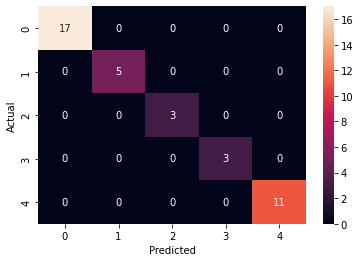

In [23]:
sns.heatmap(confusion_matrix(y_test,ypred_rf),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [24]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### 4. support vector classifier

In [25]:
model_svc=SVC()
model_svc.fit(X_train,y_train)
ypred_svc=model_svc.predict(X_test)
confusion_matrix(y_test,ypred_svc)

array([[17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5],
       [ 1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 11]])

### 5. KNN classifier

In [26]:
model_KNN=KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
ypred_KNN=model_KNN.predict(X_test)
confusion_matrix(y_test,ypred_KNN)

array([[16,  0,  0,  0,  1],
       [ 0,  5,  0,  0,  0],
       [ 1,  0,  1,  0,  1],
       [ 0,  1,  1,  0,  1],
       [ 0,  1,  3,  1,  6]])

Text(33.0, 0.5, 'Actual')

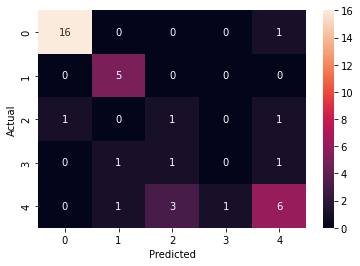

In [27]:
sns.heatmap(confusion_matrix(y_test,ypred_KNN),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### 6. Naive bayes

In [28]:
model_nb=MultinomialNB()
model_nb.fit(X_train,y_train)
ypred_nb=model_nb.predict(X_test)
confusion_matrix(y_test,ypred_nb)

array([[13,  1,  0,  1,  2],
       [ 3,  1,  1,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 1,  0,  0,  0,  2],
       [ 4,  0,  0,  0,  7]])

Text(33.0, 0.5, 'Actual')

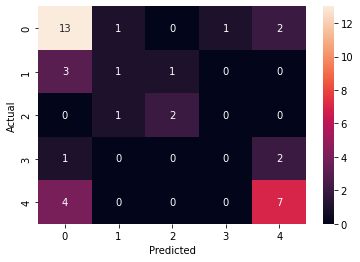

In [29]:
sns.heatmap(confusion_matrix(y_test,ypred_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
print(classification_report(y_test,ypred_nb))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.33      0.20      0.25         5
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         3
           4       0.64      0.64      0.64        11

    accuracy                           0.59        39
   macro avg       0.45      0.45      0.45        39
weighted avg       0.54      0.59      0.56        39



# Decision tree classifier and Randomforestclassifier did a very good job here without any misclassifications

# Don't forget to upvote if you liked the analysis and prediction